In [1]:
import bs4 as bs
from datetime import datetime
import numpy as np
import os
import pandas as pd
import requests
import talib
import matplotlib.pyplot as plt
import yfinance as yf 
from IPython.display import display, HTML
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
display(HTML("<style>.container {width:100% !important} <\style>"))

In [33]:
def compose_stats(folder_path, days, fixed_target=True, atr_trailing_stop=False):
    files = os.listdir(folder_path)

    all_stats = {}
    for lookback_days in days:
        stats_file = f"{folder_path}/lookback_{lookback_days}_trailing_{atr_trailing_stop}_stats.csv"
        if fixed_target:
            fixed_target_file = f"{folder_path}/lookback_{lookback_days}_trailing_{atr_trailing_stop}_fixed_target_stats.csv"        
        
        stats = pd.read_csv(stats_file, error_bad_lines=False)
        all_stats[f"{lookback_days}_{atr_trailing_stop}"] = {
            'avg_num_trades': stats['num_trades'].mean(),
            'avg_win_rate': stats['win_rate'].mean(),
            'total_profit': stats['total_profit'].sum(),
            'avg_max_dd': stats['max_dd'].mean(),  
            'avg_dd_per': stats['dd_per'].mean()}
        
        if fixed_target:
            fixed_target_stats = pd.read_csv(fixed_target_file, error_bad_lines=False)
            all_stats[f"fixed_target_{lookback_days}_{atr_trailing_stop}"] = {
                'avg_win_rate': fixed_target_stats['win_rate'].mean(),
                'total_profit': fixed_target_stats['total_profit'].sum(),
                'avg_max_dd': fixed_target_stats['max_dd'].mean(),  
                'avg_dd_per': fixed_target_stats['dd_per'].mean(),
                'avg_best_target': fixed_target_stats['best_target'].mean(),
                'avg_best_stop': fixed_target_stats['best_stop'].mean()}

    compiled = pd.DataFrame(all_stats).transpose()
    compiled['avg_num_trades'] = compiled['avg_num_trades'].ffill()
    return compiled

In [45]:
results = []
for stop in [0.3,0.4,0.5,0.6,0.7]:
    for target in [3,4,5,6,7,8,9,10,12,15,20]:
        target = float(target)
        stop = float(stop)
        folder_path = fr"C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_stats_None_russell2000_breakout_stop_{stop}_target_{target}"
        breakout_stats = compose_stats(folder_path, [120],fixed_target=False)
        breakout_stats['stop'] = stop
        breakout_stats['target'] = target
        results.append(breakout_stats)
pd.concat(results).sort_values('total_profit',ascending=False)

,avg_dd_per,avg_max_dd,avg_num_trades,avg_win_rate,total_profit,stop,target
120_False,-0.213209,3.732606,16.484424,36.899055,5241.0,0.7,20.0
120_False,-0.208053,3.683801,16.484424,36.907305,5113.0,0.7,12.0
120_False,-0.203489,3.684320,16.484424,36.904247,5099.0,0.7,15.0
120_False,-0.260789,3.596054,16.484424,35.563671,4942.0,0.6,20.0
120_False,-0.263209,3.548287,16.484424,35.571921,4827.0,0.6,12.0
120_False,-0.245955,3.548287,16.484424,35.568863,4793.0,0.6,15.0
120_False,-0.165343,3.682762,16.484424,36.909668,4775.0,0.7,10.0
120_False,-0.135691,3.682243,16.484424,36.920052,4750.0,0.7,9.0
120_False,-0.237342,3.381620,16.484424,33.914019,4561.0,0.5,20.0
120_False,-0.147196,3.681724,16.484424,36.963323,4560.0,0.7,8.0


In [34]:
folder_path = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_stats_target_russell2000_breakout'
breakout_stats = compose_stats(folder_path, [120],fixed_target=True, atr_trailing_stop=False)
breakout_stats.sort_values('total_profit', inplace=True, ascending=False)
breakout_stats

,avg_best_stop,avg_best_target,avg_dd_per,avg_max_dd,avg_num_trades,avg_win_rate,total_profit
fixed_target_120_False,0.670691,11.298936,0.352487,2.947040,16.484424,50.966911,23075.0
120_False,NaN,NaN,-0.215561,4.645898,16.484424,38.895067,5432.0


In [35]:
folder_path = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_stats_stop_russell2000_breakout'
breakout_stats = compose_stats(folder_path, [120],fixed_target=True, atr_trailing_stop=False)
breakout_stats.sort_values('total_profit', inplace=True, ascending=False)
breakout_stats

,avg_best_stop,avg_best_target,avg_dd_per,avg_max_dd,avg_num_trades,avg_win_rate,total_profit
fixed_target_120_False,0.670691,11.298936,0.032804,2.455867,16.484424,35.289725,10013.0
120_False,NaN,NaN,-0.215561,4.645898,16.484424,38.895067,5432.0


In [10]:
def calc_sharpe(trades):
    trades_sharpe = trades[['exit_time','net_profit%_of_cap']].groupby('exit_time').sum()
    returns = np.log10(1 + (trades_sharpe['net_profit%_of_cap']/100))
    sharpe = (returns.mean() / returns.std()) / 252**0.5
    sharpe = sharpe * 100
    print('===> sharpe:',sharpe)

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


dd -94 profit 5639 ratio 59
===> sharpe: 1.2841085034448891


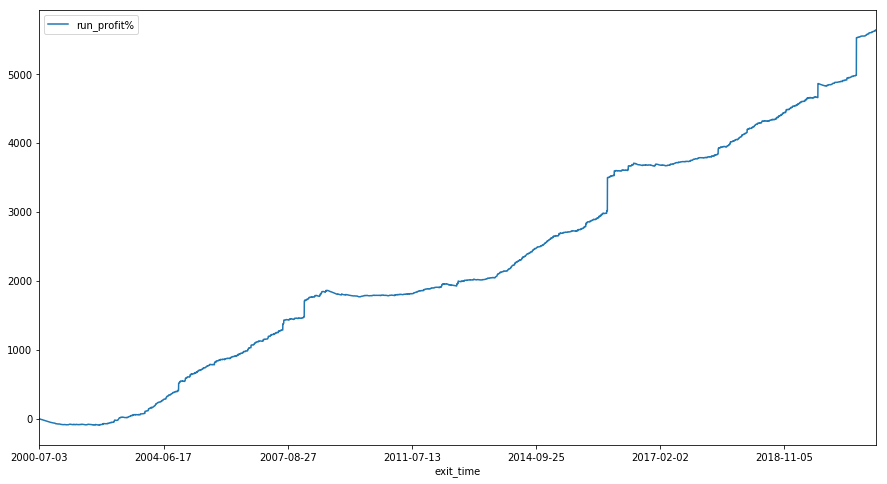

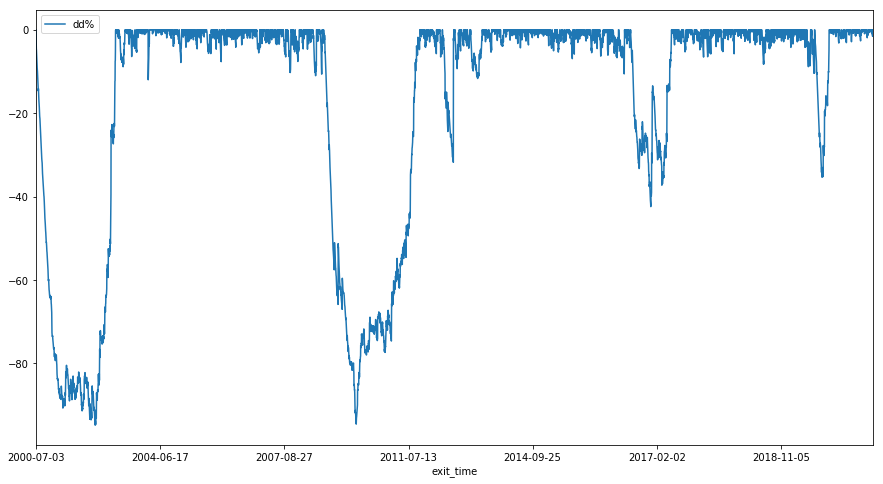

In [205]:
[30,40,50,60,70,80,90,120,150,180,210,250,280,310,365,400,600,730]

trades_path1 = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_trades_sp500_breakout\lookback_120_trailing_False_trades.csv'
trades_path2 = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_trades_russell2000_breakout\lookback_120_trailing_False_trades.csv'
# trades_path = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_trades_target_russell2000_breakout\lookback_120_trailing_False_trades.csv'
# trades_path = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_trades_stop_russell2000_breakout\lookback_120_trailing_False_trades.csv'
# trades_path = r'C:\Users\Jameshuckle\Dropbox\Bitcoin\SimpleDigitalAssets\backtest_results_trades_None_russell2000_breakout_stop_0.7_target_3.0\lookback_120_trailing_False_trades.csv'

#trades = pd.read_csv(trades_path)
trades1 = pd.read_csv(trades_path1)
trades2 = pd.read_csv(trades_path2)
trades = pd.concat([trades1,trades2])

# calcs ##
trades['band_size%'] = (trades['band_size'] / trades['entry']) * 100

# features ##
trades = trades[(trades['band_size%'] > 3) & (trades['band_size%'] < 100)]
trades = trades[((trades['direction'] == 'long') & (trades['sharpe'] > 0.3) & (trades['sharpe'] < 2)) |
                 ((trades['direction'] == 'short') & (trades['sharpe'] > 0.4) & (trades['sharpe'] < 1))]
#trades = trades[trades['direction'] == 'long']

###
trades.sort_values('exit_time',inplace=True)
trades['run_profit%'] = trades['net_profit%_of_cap'].cumsum()
trades['dd%'] = trades['run_profit%'] - trades['run_profit%'].cummax()
trades.plot(x='exit_time',y='run_profit%',figsize=(15,8))
trades.plot(x='exit_time',y='dd%',figsize=(15,8))
dd = int(trades['dd%'].min())
profit = int(trades['run_profit%'].tail(1).values[0])
print('dd',dd,'profit',profit,'ratio',int(profit/-dd))
calc_sharpe(trades)

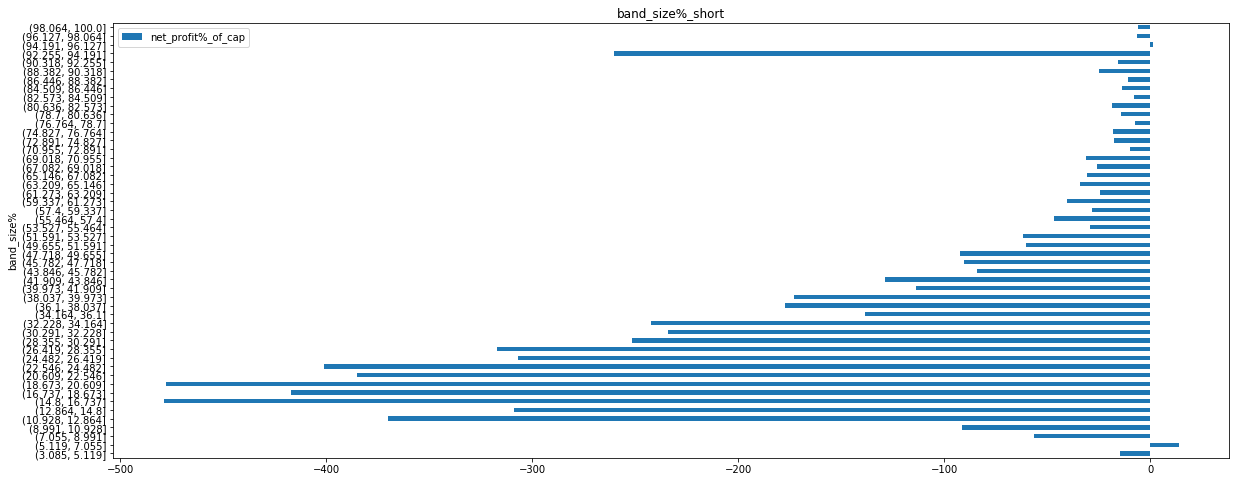

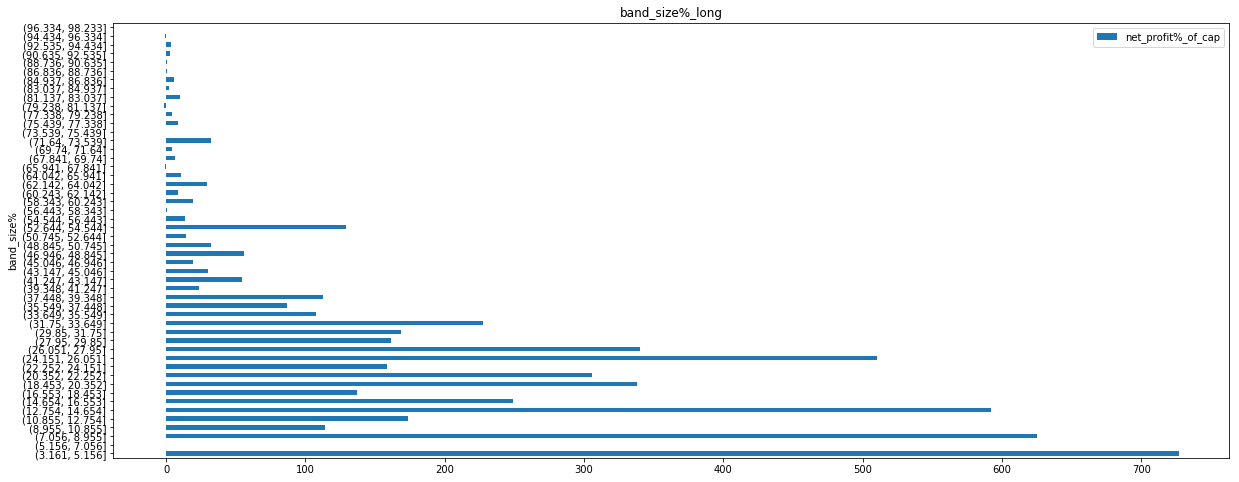

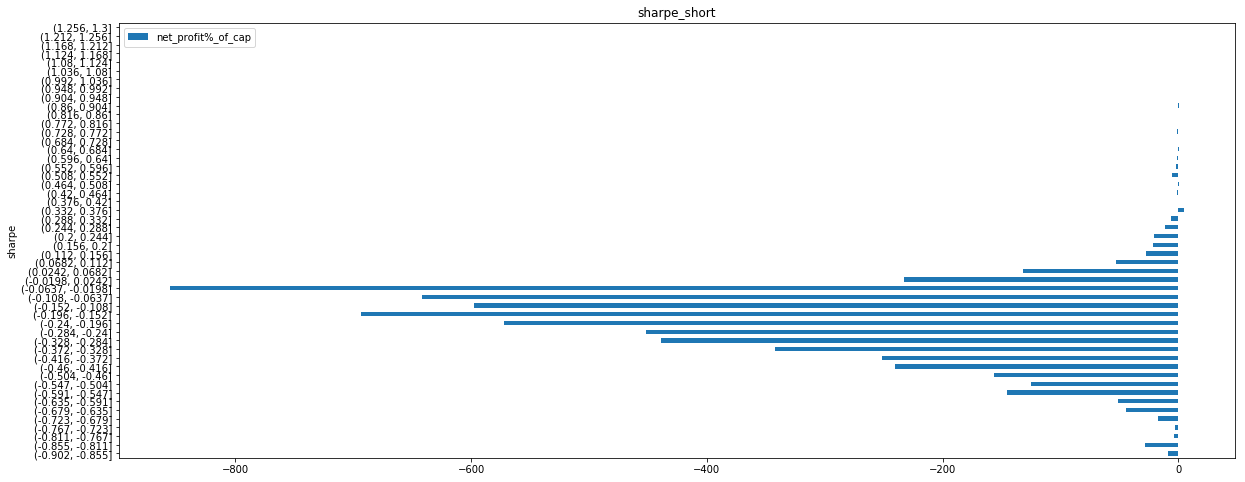

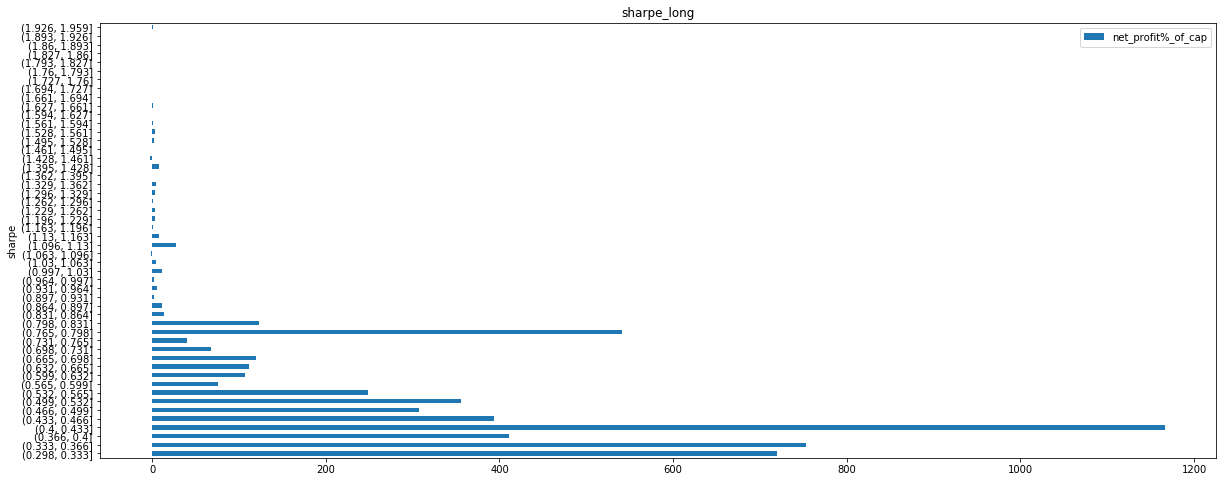

In [193]:
feature = 'band_size%' #'band_size%' 'sharpe'

for feature in ['band_size%','sharpe']:
    for side in ['short','long']:
        subset = trades[trades['direction'] == side]
        #subset = trades.copy()
        feature_cut = pd.cut(subset[feature],50)
        featured = subset[['net_profit%_of_cap',feature]].groupby(feature_cut).sum()
        featured.plot.barh(y='net_profit%_of_cap', title=feature+'_'+side, figsize=(20,8))